In [1]:
import sys
import numpy as np
import scipy as sci
import pandas as pd

sys.path.append('/Users/marco/Dropbox (Personal)/Musica/Applications/musicntwrk')
from musicntwrk.musicntwrk import *
from musicntwrk.networks.rhythmPDictionary import rhythmPDictionary
from musicntwrk.networks.rhythmNetwork import rhythmNetwork
from musicntwrk.utils.vectorDistance import vectorDistance
from musicntwrk.utils.str2frac import str2frac

(array([6, 2, 0, 0, 0, 0, 0, 0]), '1/8 1/4 3/8 1/2 5/8 3/4 7/8 1/1')
(array([0, 1, 2, 2, 0, 3, 2, 0]), '1/8 1/4 3/8 1/2 5/8 3/4 7/8 1/1')
False


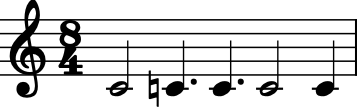

In [2]:
a=['h','qd','qd','h','q']
a = RHYTHMSeq(a,REF='e')
print(a.durationVector())
print(a.rIntervalVector())
print(a.isNonRetro())
a.displayRhythm()

In [3]:
dictionary,zrel = rhythmPDictionary(16,5,REF='e')
dictionary.to_csv('16-5.csv',index=False)

In [22]:
# read dictionary
dictionary = pd.read_csv('16-5.csv')

In [20]:
dictionary.head()

,cell,r-seq,r-vec
0,5-1,1/8 3/2 1/8 1/8 1/8,"[4,3,0,0,0,0,0,0]"
1,5-2Z,1/8 1/4 11/8 1/8 1/8,"[3,3,1,0,0,0,0,0]"
2,5-3Z,1/8 3/8 5/4 1/8 1/8,"[3,2,1,1,0,0,0,0]"
3,5-4Z,1/8 1/2 9/8 1/8 1/8,"[3,2,0,1,1,0,0,1]"
4,5-5Z,1/8 1/8 1/8 5/8 1/1,"[3,2,0,0,1,1,0,2]"


In [5]:
dict_rvec = dictionary.set_index("r-vec", drop = True)
dict_rseq = dictionary.set_index("r-seq", drop = True)
dict_cell = dictionary.set_index("cell", drop = True)

In [6]:
shiko   = ['shiko',[0,2,0,3,0,4,0,1]]
son     = ['son',[0,1,2,2,0,3,2,0]]
soukous = ['soukous',[1,0,2,1,2,2,1,1]]
rumba   = ['rumba',[0,1,2,2,1,1,3,0]]
bossa   = ['bossa',[0,0,4,1,0,3,2,0]]
gahu    = ['gahu',[0,1,2,2,1,2,1,1]]

In [7]:
rhythms = [shiko,son,soukous,rumba,bossa,gahu]

In [8]:
for r in range(len(rhythms)):
    for s in range(r,len(rhythms)):
        if r != s:
            print(rhythms[r][0],rhythms[s][0],vectorDistance(rhythms[r][1],rhythms[s][1]),
                  sci.spatial.distance.hamming(rhythms[r][1],rhythms[s][1]))

shiko son [3.46410162] 0.75
shiko soukous [4.69041576] 0.875
shiko rumba [5.09901951] 0.875
shiko bossa [5.47722558] 0.75
shiko gahu [3.46410162] 0.75
son soukous [3.16227766] 0.875
son rumba [2.44948974] 0.375
son bossa [2.44948974] 0.375
son gahu [2.] 0.5
soukous rumba [3.16227766] 0.875
soukous bossa [3.46410162] 0.75
soukous gahu [2.] 0.5
rumba bossa [3.46410162] 0.75
rumba gahu [2.44948974] 0.375
bossa gahu [3.16227766] 0.875


In [10]:
rnodes,redges = rhythmNetwork(dictionary,thup=5.5,thdw=0.01,distance='euclidean',prob=1,write=True)
# _,temp = rhythmNetwork('16-5.csv',thup=2.6,thdw=2.4)
# redges.append(temp)
# _,temp = rhythmNetwork('16-5.csv',thup=3.2,thdw=3.1)
# redges.append(temp)
# _,temp = rhythmNetwork('16-5.csv',thup=3.47,thdw=3.45)
# redges.append(temp)
# _,temp = rhythmNetwork('16-5.csv',thup=4.70,thdw=4.67)
# redges.append(temp)
# _,temp = rhythmNetwork('16-5.csv',thup=5.1,thdw=5.0)
# redges.append(temp)
# _,temp = rhythmNetwork('16-5.csv',thup=5.5,thdw=5.45)
# redges.append(temp)

/Users/marco/anaconda3/envs/compmus/lib/python3.11/site-packages/musicntwrk/networks/rhythmNetwork.py:78: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dedges = pd.concat([dedges,tmp],ignore_index=True)


In [110]:
rnodes.to_csv('nodes.csv',index=False)
redges.to_csv('edges.csv',index=False)

In [13]:
redges.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188129 entries, 0 to 375652
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Source  188129 non-null  object 
 1   Target  188129 non-null  object 
 2   Weight  188129 non-null  float64
dtypes: float64(1), object(2)
memory usage: 5.7+ MB


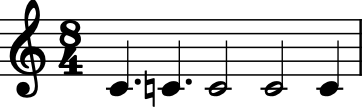

In [17]:
# RHYTHMSeq(str2frac(dict_rvec.loc[str(gahu).replace(' ','')].iloc[1]),REF='e').displayRhythm()
RHYTHMSeq(str2frac(dict_cell.loc['5-429Z'].iloc[0])).displayRhythm()

In [18]:
dictionary.head()

,cell,r-seq,r-vec
0,5-1,1/8 3/2 1/8 1/8 1/8,"[4,3,0,0,0,0,0,0]"
1,5-2Z,1/8 1/4 11/8 1/8 1/8,"[3,3,1,0,0,0,0,0]"
2,5-3Z,1/8 3/8 5/4 1/8 1/8,"[3,2,1,1,0,0,0,0]"
3,5-4Z,1/8 1/2 9/8 1/8 1/8,"[3,2,0,1,1,0,0,1]"
4,5-5Z,1/8 1/8 1/8 5/8 1/1,"[3,2,0,0,1,1,0,2]"


In [21]:
gl = np.asarray(dict_rvec.loc[str(gahu[1]).replace(' ','')])

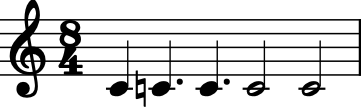

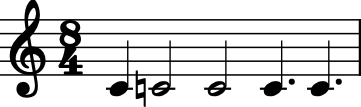

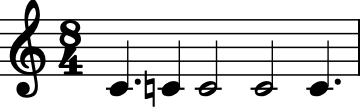

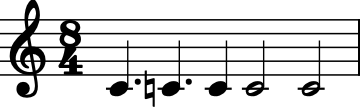

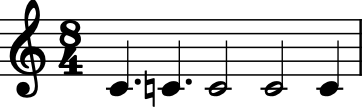

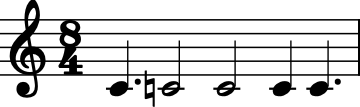

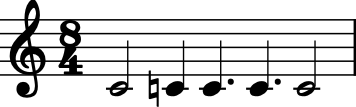

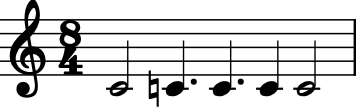

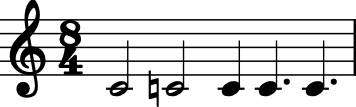

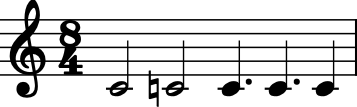

In [22]:
for n in range(gl.shape[0]):
    RHYTHMSeq(str2frac(gl[n,1]),REF='e').displayRhythm()

### Note on pandas indexing (forward compatibility)

In newer pandas versions, doing `series[index]` after selecting with `.loc` is treated as label-based, not positional. Code like:

- `dict_cell.loc['5-429Z'][0]`
- `dict_rvec.loc[str(gahu).replace(' ','')][1]`

may fail or select the wrong element if the Series index contains 0/1 labels. Use `.iloc` for positional access:

- `dict_cell.loc['5-429Z'].iloc[0]`
- `dict_rvec.loc[str(gahu).replace(' ','')].iloc[1]`

And prefer `.loc[...]` when you mean labels and `.iloc[...]` when you mean positions.